In [1]:
import tensorflow as tf
import numpy as np
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from wrappers import wrapper
from agent_testing import DQNAgent
import time

import matplotlib.pyplot as plt

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = wrapper(env)

states = (84, 84, 4)
actions = env.action_space.n

agent = DQNAgent(states=states, actions=actions, max_memory=100000, double_q=True)
agent.reloadModel()

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.
INFO:tensorflow:Restoring parameters from ./new_reward_models/model-2435923


In [4]:
from PIL import Image

def replay(env, model_path, n_replay):
    """ Model replay """
    ckpt = tf.compat.v1.train.latest_checkpoint(model_path)
    saver = tf.compat.v1.train.import_meta_graph(ckpt + '.meta')
    graph = tf.compat.v1.get_default_graph()
    input = graph.get_tensor_by_name('input:0')
    output = graph.get_tensor_by_name('online/output/BiasAdd:0')
    # Replay RL agent
    state = env.reset()
    total_reward = 0
    with tf.compat.v1.Session() as sess:
        saver.restore(sess, ckpt)
        for _ in range(n_replay):
            step = 0
            state = env.reset()
            #plt.imshow(np.array(state)[:,:,0].reshape(84,84),cmap='gray')
            #plt.axis('off')
            #plt.show()
            i = 0
            while True:
                
                time.sleep(0.05)
                env.render()
                #temp = env.render(mode='rgb_array')
                #img = Image.fromarray(temp)
                #img.save("images/mario_run{:02d}.jpeg".format(i))
                #i += 1

                #time.sleep(2)
                # Action
                if np.random.rand() < 0.0:
                    action = np.random.randint(low=0, high=actions, size=1)[0]
                else:
                    q = sess.run(fetches=output, feed_dict={input: np.expand_dims(state, 0)})
                    action = np.argmax(q)
                    #print(SIMPLE_MOVEMENT[action])
                next_state, reward, done, info = env.step(action)
                total_reward += reward
                state = next_state
                step += 1
                if info['flag_get']:
                    break
                if done:
                    break
    plt.imshow(np.array(state)[:,:,0].reshape(84,84),cmap='gray')
    plt.axis('off')
    plt.show()
    #env.close()

INFO:tensorflow:Restoring parameters from ./new_reward_models/model-2435923
['right', 'B']
['right', 'B']
['right', 'B']
['right', 'B']
['right', 'B']
['right', 'B']
['right', 'B']
['right', 'B']
['right', 'A', 'B']
['A']
['right', 'A', 'B']
['A']
['A']
['A']
['A']
['right']
['right', 'B']
['right', 'A']
['A']
['right', 'A']
['right', 'B']
['right', 'A', 'B']
['right', 'B']
['right']


/home/gmo/.local/lib/python3.5/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


['right', 'A', 'B']
['right', 'A']
['A']
['A']
['A']
['right', 'A', 'B']
['right', 'A']
['right', 'B']
['right', 'B']
['A']
['right', 'A']
['A']
['right']
['A']
['A']
['A']
['A']
['A']
['right', 'B']
['right', 'B']
['right', 'B']
['A']
['right', 'A', 'B']
['right', 'A', 'B']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['right', 'A']
['A']
['NOOP']
['A']
['right', 'A']
['right', 'A']
['right', 'A']
['right', 'A', 'B']
['right', 'A']
['right', 'A']
['right', 'A']
['right', 'A', 'B']
['right']
['right']
['right']
['right']
['right']
['right', 'A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']
['A']


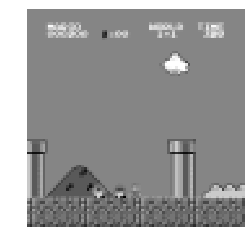

In [5]:
replay(env,'./new_reward_models/',1)